In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from publish import *
from scipy import stats

# GREENS DATA TRAJECTORIES

In [16]:
obesity_data = pd.read_csv("Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")

# Selecting only relevant columns
obesity_data = obesity_data[["YearStart", "LocationAbbr", "Question", "Data_Value", "Low_Confidence_Limit", "High_Confidence_Limit", "Sample_Size", "QuestionID", "StratificationID1"]]

obesity_data

/var/folders/7_/dyzyr7j12mx5_8rbvq0b52r80000gn/T/ipykernel_32587/3795172205.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv("Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")


,YearStart,LocationAbbr,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,StratificationID1
0,2019,AK,Percent of students in grades 9-12 who achieve...,9.6,5.5,16.5,130.0,Q048,RACEASN
1,2019,AZ,Percent of students in grades 9-12 who have ob...,13.3,10.7,16.5,1739.0,Q038,OVERALL
2,2019,DC,Percent of students in grades 9-12 who have ob...,17.1,16.2,17.9,8978.0,Q038,OVERALL
3,2019,IL,Percent of students in grades 9-12 who partici...,65.9,49.8,79.1,876.0,Q049,GRADE10
4,2019,MD,Percent of students in grades 9-12 who have an...,16.7,14.5,19.2,2573.0,Q039,RACE2PLUS
...,...,...,...,...,...,...,...,...,...
133340,2022,WY,Percent of adults aged 18 years and older who ...,24.5,16.3,35.3,111.0,Q037,INCLESS15
133341,2022,WY,Percent of adults who engage in no leisure-tim...,36.0,27.9,45.0,159.0,Q047,EDUHS
133342,2022,WY,Percent of adults aged 18 years and older who ...,35.2,30.6,40.0,450.0,Q036,AGEYR3544
133343,2022,WY,Percent of adults aged 18 years and older who ...,35.3,30.2,40.7,512.0,Q037,INC3550


In [17]:
ID_to_question_map = {}

for _, row in obesity_data[["Question", "QuestionID"]].iterrows():
    if row["QuestionID"] not in ID_to_question_map:
        ID_to_question_map[row["QuestionID"]] = row["Question"]
    elif row["Question"] != ID_to_question_map[row["QuestionID"]]:
        print("INCONSISTENT MAP")
obesity_data = obesity_data.drop(["Question"], axis=1)

ID_to_question_map

{'Q048': 'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
 'Q038': 'Percent of students in grades 9-12 who have obesity',
 'Q049': 'Percent of students in grades 9-12 who participate in daily physical education',
 'Q039': 'Percent of students in grades 9-12 who have an overweight classification',
 'Q058': 'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day',
 'Q021': 'Percent of students in grades 9-12 who consume vegetables less than 1 time daily',
 'Q020': 'Percent of students in grades 9-12 who consume fruit less than 1 time daily',
 'Q059': 'Percent of students in grades 9-12 watching 3 or more hours of television each school day',
 'Q047': 'Percent of adults who engage in no leisure-time physical activity',
 'Q036': 'Percent of adults aged 18 years and older who have obesity',
 'Q037': 'Percent of adults aged 18 years and older who have an overweight classification',


#### We are interested in Question IDs: 18, 19, 20, 21

In [18]:
# Selecting rows with relevant question IDs
obesity_data = obesity_data[((obesity_data["QuestionID"].apply(lambda x: int(x[2:]))) <= 21) & ((obesity_data["QuestionID"].apply(lambda x: int(x[2:]))) >= 18)]

obesity_data

,YearStart,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,StratificationID1
20,2019,IA,43.1,38.4,47.9,1529.0,Q021,OVERALL
21,2019,KS,43.1,37.0,49.5,258.0,Q020,GRADE11
23,2019,OK,58.9,53.9,63.8,931.0,Q020,RACEWHT
24,2019,VT,29.4,28.1,30.6,5102.0,Q021,GRADE09
25,2019,WV,47.3,42.3,52.3,438.0,Q021,GRADE10
...,...,...,...,...,...,...,...,...
128858,2021,OH,18.6,15.8,21.8,1483.0,Q019,INC3550
128859,2021,WY,28.2,21.0,36.6,295.0,Q019,INC1525
128860,2021,HI,56.5,51.0,61.9,467.0,Q018,AGEYR1824
128863,2021,ND,27.2,25.1,29.5,2690.0,Q019,MALE


In [19]:
questions = obesity_data["QuestionID"].unique()
states = obesity_data["LocationAbbr"].unique()
strata = obesity_data["StratificationID1"].unique()

questions, states, strata

(array(['Q021', 'Q020', 'Q018', 'Q019'], dtype=object),
 array(['IA', 'KS', 'OK', 'VT', 'WV', 'US', 'UT', 'FL', 'VA', 'WY', 'TN',
        'GA', 'MI', 'NV', 'SC', 'NC', 'ID', 'CT', 'MT', 'AL', 'CO', 'CA',
        'IN', 'HI', 'DE', 'PA', 'ME', 'NH', 'AK', 'TX', 'KY', 'LA', 'NJ',
        'ND', 'AR', 'GU', 'MA', 'NM', 'AZ', 'MS', 'IL', 'DC', 'SD', 'MD',
        'MO', 'WI', 'NE', 'RI', 'PR', 'NY', 'OH', 'VI', 'WA', 'MN', 'OR'],
       dtype=object),
 array(['OVERALL', 'GRADE11', 'RACEWHT', 'GRADE09', 'GRADE10', 'FEMALE',
        'MALE', 'RACEHIS', 'RACE2PLUS', 'GRADE12', 'RACEASN', 'RACEHPI',
        'RACEBLK', 'RACENAA', 'INCLESS15', 'INC2535', 'AGEYR4554', 'EDUHS',
        'EDUHSGRAD', 'AGEYR1824', 'INC1525', 'INC3550', 'RACEOTH',
        'AGEYR3544', 'INC75PLUS', 'EDUCOGRAD', 'EDUCOTEC', 'AGEYR2534',
        'AGEYR65PLUS', 'INC5075', 'AGEYR5564', 'INCNR', nan], dtype=object))

#### For now, I will ignore stratification and states, and only aggregate data

In [20]:
question_dfs = {}

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in questions:
    temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == "OVERALL")].drop(["StratificationID1", "QuestionID"], axis=1)
    temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

    weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
    temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
    
    question_dfs[question] = temp_df

question_dfs

{'Q021':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
 YearStart                                                         
 2001                  32.220318              37.598165   34.842554
 2003                  33.799630              39.248611   36.466599
 2005                  34.681361              40.549817   37.552871
 2007                  36.204613              42.366592   39.238145
 2009                  35.711478              41.281227   38.447037
 2011                  35.240220              40.678839   37.918598
 2013                  36.399831              40.602314   38.473181
 2015                  37.984005              41.860534   39.905238
 2017                  39.065668              43.084096   41.060240
 2019                  39.563916              44.466612   42.000331,
 'Q020':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
 YearStart                                                         
 2001                  35.92600

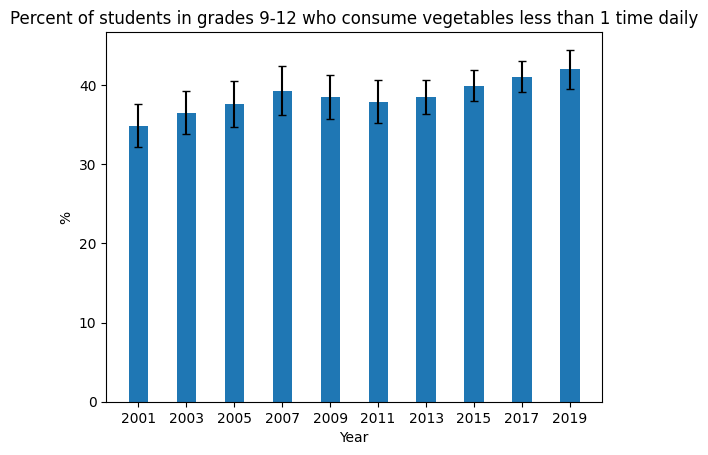

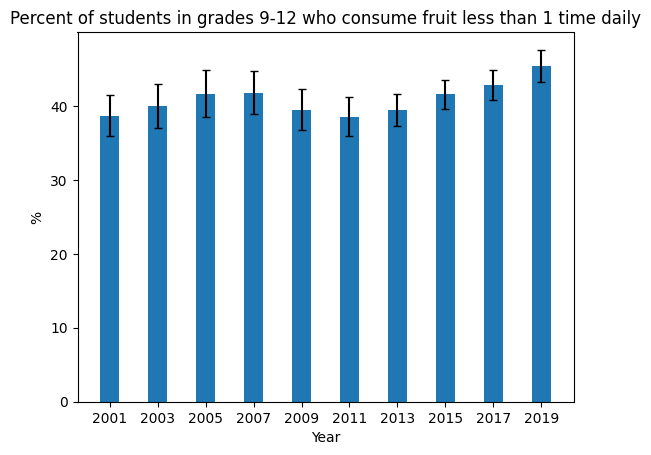

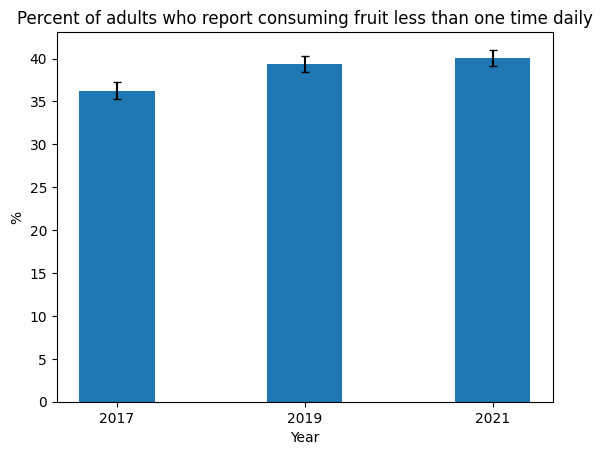

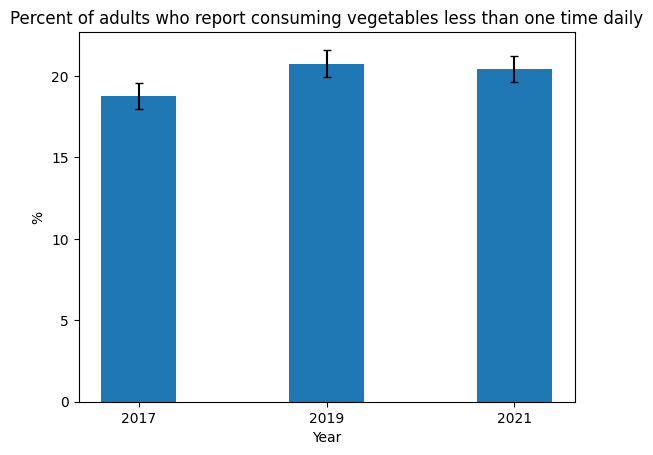

In [21]:
for question in question_dfs:
    xs = question_dfs[question].index
    ys = question_dfs[question]["Data_Value"]

    upper_error = question_dfs[question]["High_Confidence_Limit"] - question_dfs[question]["Data_Value"]
    lower_error = question_dfs[question]["Data_Value"] - question_dfs[question]["Low_Confidence_Limit"]

    plt.gcf()
    plt.bar(xs, ys, yerr=[lower_error, upper_error], capsize=3)
    plt.xlabel("Year")
    plt.ylabel("%")
    if (question == "Q021" or question == "Q020"):
        plt.xticks(np.arange(2001, 2021, step=2))
    else:
        plt.xticks(np.arange(2017, 2023, step=2))
    plt.title(ID_to_question_map[question])
    plt.show()

#### We now consider the breakdown by stratification, starting with race.

In [22]:
races = []

for stratum in strata:
    if str(stratum).find("RACE") != -1:
        races.append(stratum)

# swapping positions of white and hispanic (for cleaner visuals)
races[0] = 'RACEHPI'
races[4] = 'RACEWHT'

races

['RACEHPI',
 'RACEHIS',
 'RACE2PLUS',
 'RACEASN',
 'RACEWHT',
 'RACEBLK',
 'RACENAA',
 'RACEOTH']

In [23]:
# names of each race (for clarity)
race_names = ['Hawaiian/Pacific Islander', 'Hispanic', '2 or more', 'Asian', 'White', 'Black', 'Native American', 'Other']

In [24]:
obesity_data[obesity_data["StratificationID1"]=='RACEOTH'].dropna() # note: other race is only tracked for adults (Q018, Q019)

,YearStart,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,StratificationID1
50856,2017,MD,25.9,15.8,39.5,106.0,Q018,RACEOTH
51772,2017,DC,12.0,5.5,24.2,83.0,Q019,RACEOTH
51785,2017,CT,10.3,5.2,19.2,99.0,Q019,RACEOTH
54183,2017,CA,19.4,12.0,29.8,125.0,Q019,RACEOTH
54562,2017,US,31.2,27.0,35.7,1967.0,Q018,RACEOTH
...,...,...,...,...,...,...,...,...
128152,2021,CO,17.8,9.7,30.5,82.0,Q019,RACEOTH
128627,2021,TX,41.2,21.9,63.7,92.0,Q018,RACEOTH
128745,2021,CA,16.5,6.4,36.4,68.0,Q019,RACEOTH
128779,2021,MO,17.8,9.4,31.0,81.0,Q019,RACEOTH


In [25]:
race_question_dfs = [{},{},{},{},{},{},{},{}]

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in questions:
    for i in range(len(races)):
        temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == races[i])].drop(["QuestionID"], axis=1)
        temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

        weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
        temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
        
        race_question_dfs[i][question] = temp_df

race_question_dfs

[{'Q021':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2005                  36.143000              51.202000   43.533000
  2007                  41.200000              62.200000   51.800000
  2009                  30.749118              44.491688   37.221411
  2011                  37.884509              48.722871   43.155556
  2013                  29.228660              41.194704   35.020249
  2015                  38.287673              47.148619   42.639053
  2017                  40.980382              51.250895   46.044648
  2019                  42.393398              50.538205   46.404831,
  'Q020':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2001                  29.500000              55.200000   41.800000
  2005                  38.091071              53.751389   45.648214
  2007           

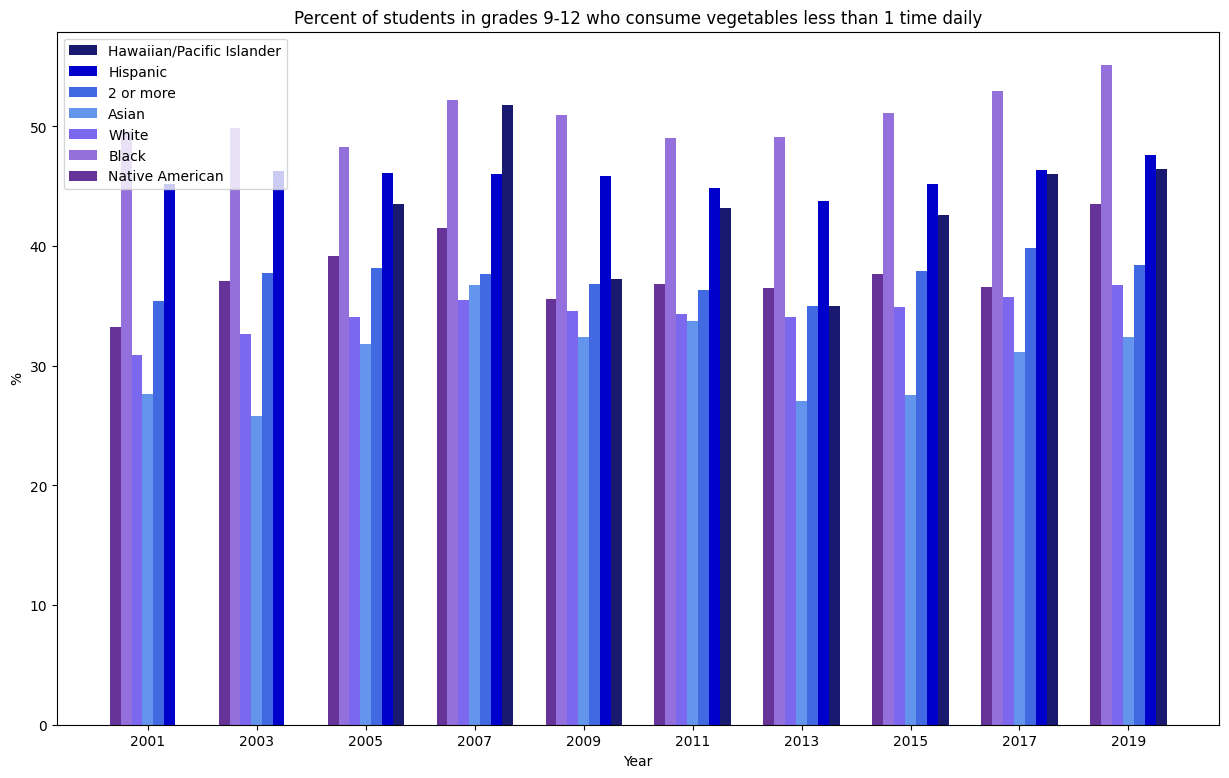

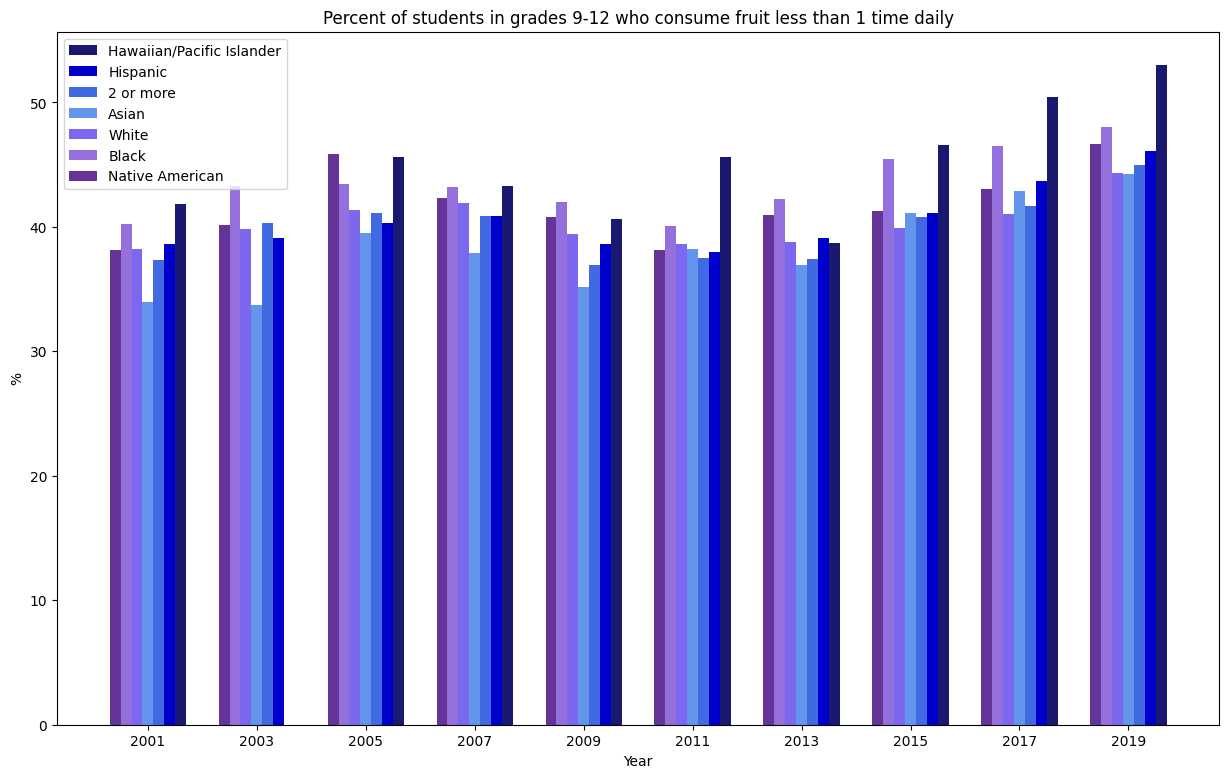

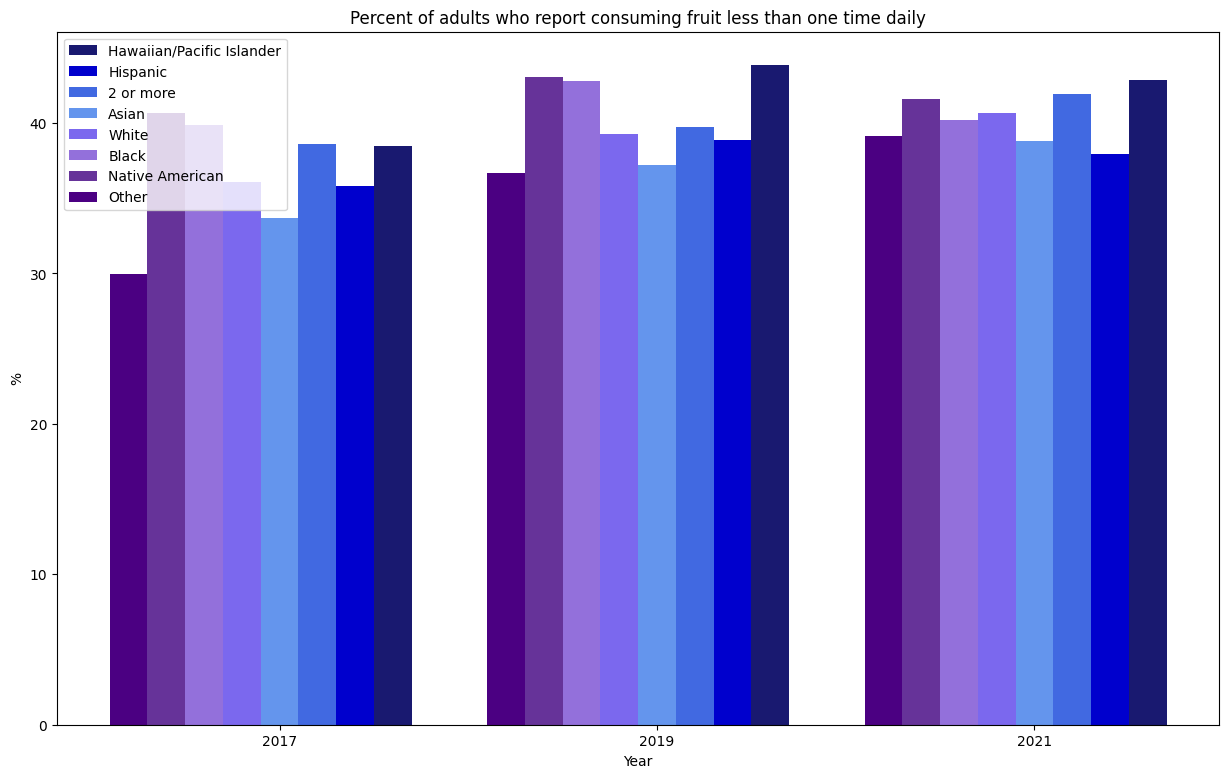

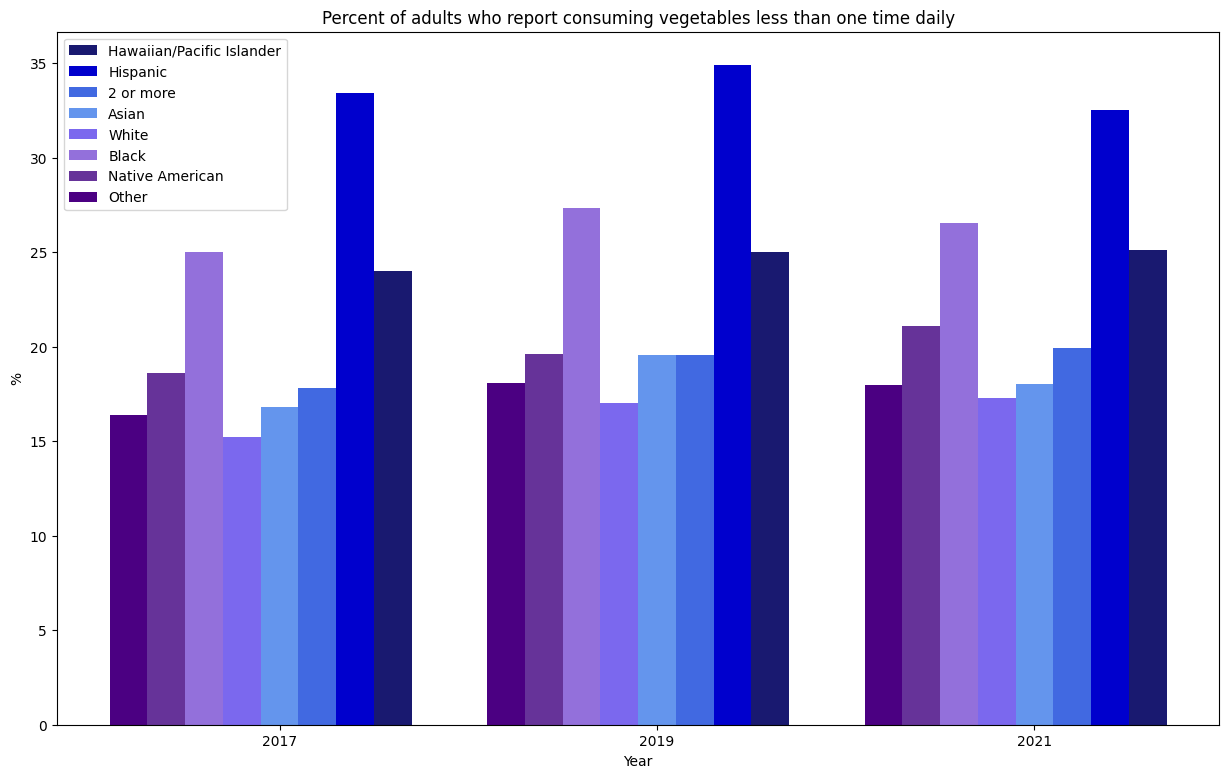

In [26]:
# colors for bar chart
colors = ['midnightblue','mediumblue','royalblue','cornflowerblue','mediumslateblue','mediumpurple','rebeccapurple','indigo']

for question in questions:

    if (question == "Q021" or question == "Q020"):
        num_races = len(races) - 1 # other is not tracked for these q's
    else:
        num_races = len(races)

    plt.figure(figsize=(15,9))

    for i in range(num_races):
        xs = race_question_dfs[i][question].index
        ys = race_question_dfs[i][question]["Data_Value"]

        upper_error = race_question_dfs[i][question]["High_Confidence_Limit"] - race_question_dfs[i][question]["Data_Value"]
        lower_error = race_question_dfs[i][question]["Data_Value"] - race_question_dfs[i][question]["Low_Confidence_Limit"]
        
        plt.bar(xs-0.2*i+0.6, ys, 0.2, capsize=3, label=race_names[i], color=colors[i])

    plt.gcf()
    plt.xlabel("Year")
    plt.ylabel("%")
    if (question == "Q021" or question == "Q020"):
        plt.xticks(np.arange(2001, 2021, step=2))
    else:
        plt.xticks(np.arange(2017, 2023, step=2))
    plt.title(ID_to_question_map[question])
    plt.legend()
    plt.show()

#### next, age:

In [27]:
ages = []

for stratum in strata:
    if str(stratum).find("AGE") != -1:
        ages.append(stratum)

ages.sort()

ages

['AGEYR1824',
 'AGEYR2534',
 'AGEYR3544',
 'AGEYR4554',
 'AGEYR5564',
 'AGEYR65PLUS']

In [28]:
grades = []

for stratum in strata:
    if str(stratum).find("GRADE") != -1:
        grades.append(stratum)

grades.sort()

grades

['GRADE09', 'GRADE10', 'GRADE11', 'GRADE12']

In [29]:
age_names = ['18-24','25-34','35-44','45-54','55-64','65+']
grade_names = ['9th grade', '10th grade', '11th grade', '12th grade']

In [30]:
age_question_dfs = [{},{},{},{},{},{}]

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in ["Q018", "Q019"]:
    for i in range(len(ages)):
        temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == ages[i])].drop(["QuestionID"], axis=1)
        temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

        weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
        temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
        
        age_question_dfs[i][question] = temp_df

age_question_dfs

[{'Q018':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  36.799604              43.507145   40.059122
  2019                  40.767358              47.628522   44.136820
  2021                  42.177451              49.069415   45.573724,
  'Q019':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  22.480444              28.516533   25.297297
  2019                  24.244158              30.449570   27.152649
  2021                  24.931476              31.296728   27.956806},
 {'Q018':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  34.650046              39.679798   37.083969
  2019                  39.774826              45.049523   42.358588
  2021 

In [31]:
grade_question_dfs = [{},{},{},{}]

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in ["Q020", "Q021"]:
    for i in range(len(grades)):
        temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == grades[i])].drop(["QuestionID"], axis=1)
        temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

        weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
        temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
        
        grade_question_dfs[i][question] = temp_df

grade_question_dfs

[{'Q020':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2001                  33.515753              41.993002   37.651930
  2003                  35.780097              44.969725   40.267884
  2005                  37.020680              46.486501   41.659809
  2007                  37.403779              46.740002   41.977638
  2009                  34.541316              43.720629   39.021356
  2011                  34.099973              42.567092   38.235406
  2013                  36.489279              43.272037   39.816262
  2015                  37.905093              44.651642   41.217417
  2017                  38.784821              45.273447   41.991164
  2019                  40.990771              48.275633   44.596287,
  'Q021':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2001           

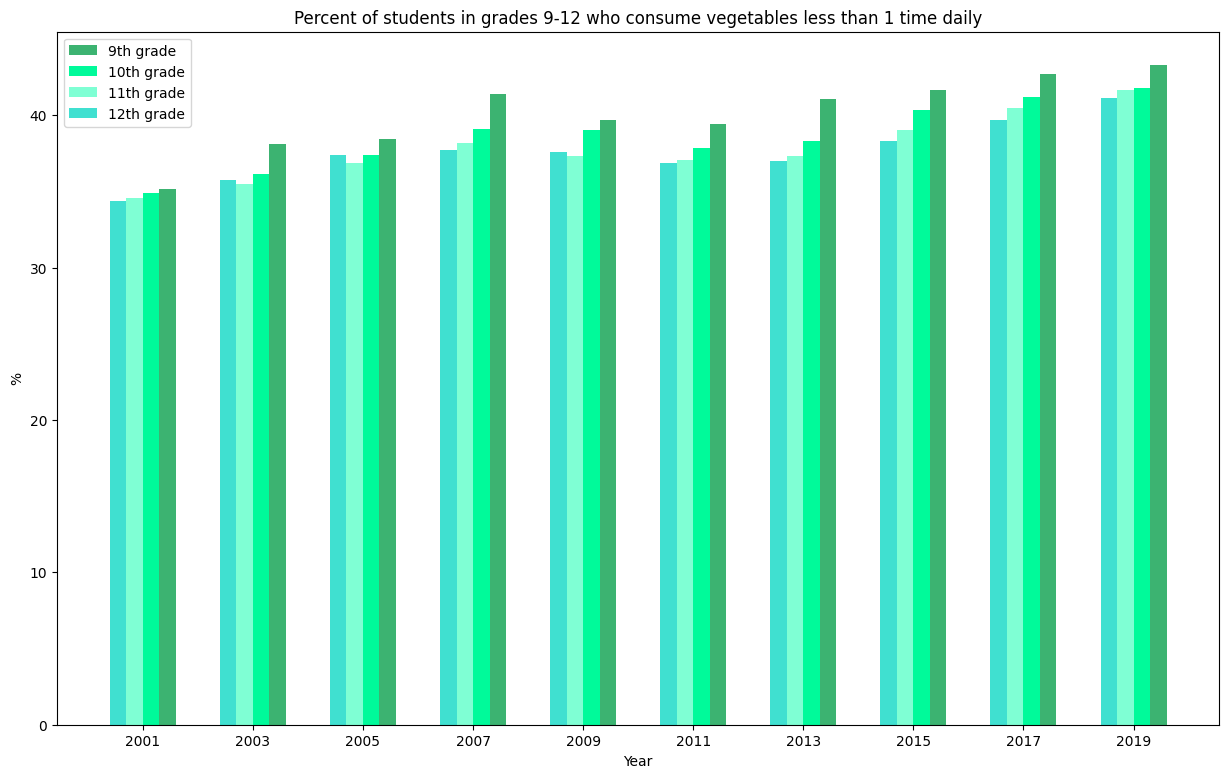

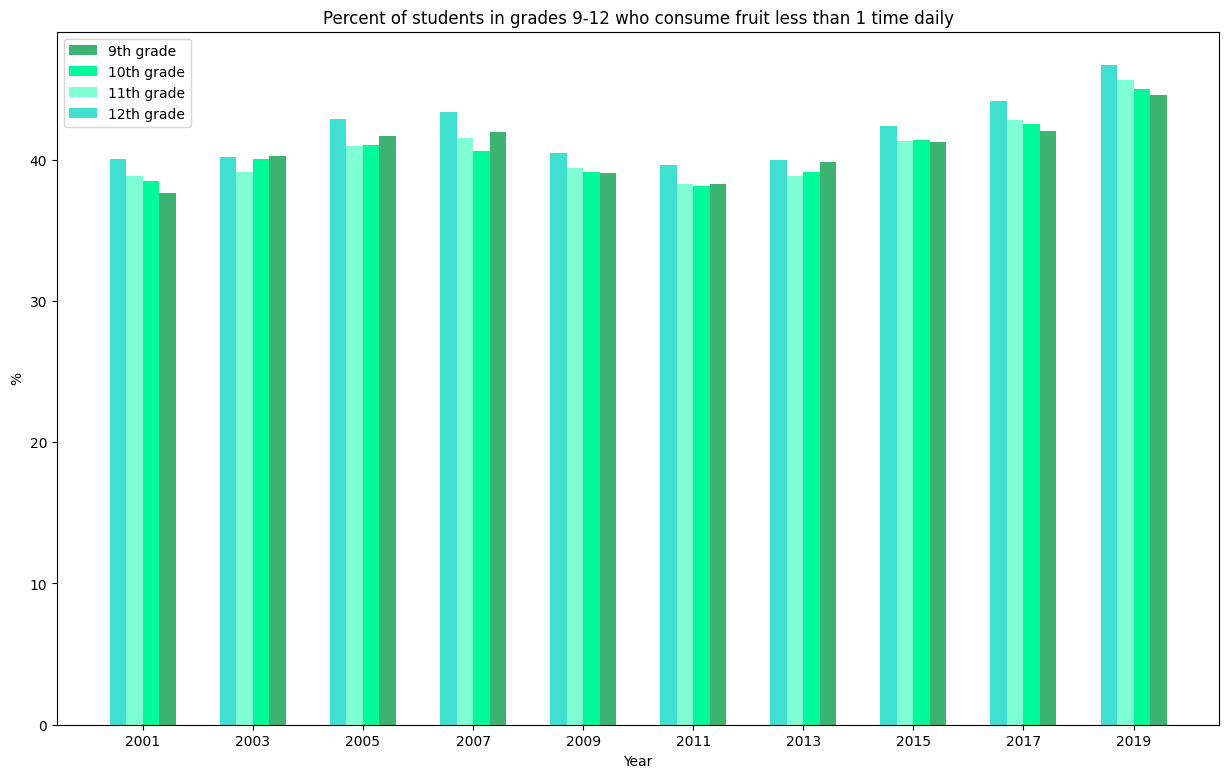

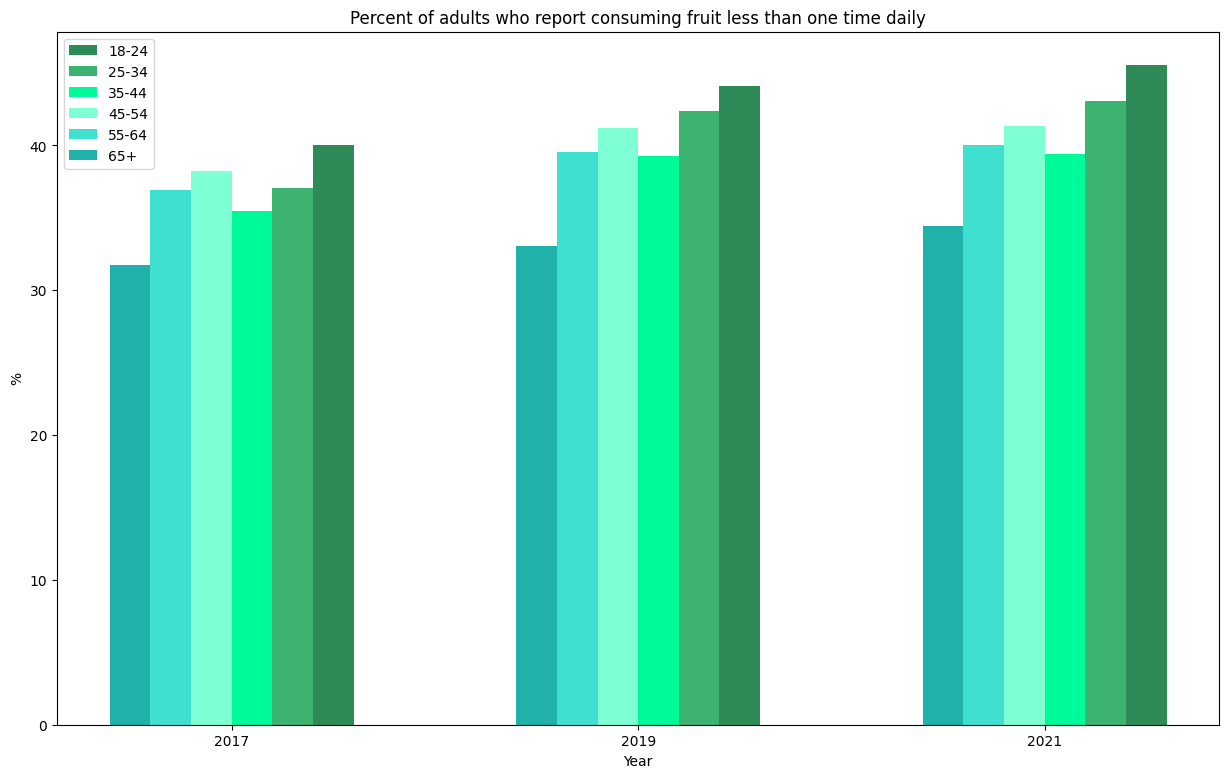

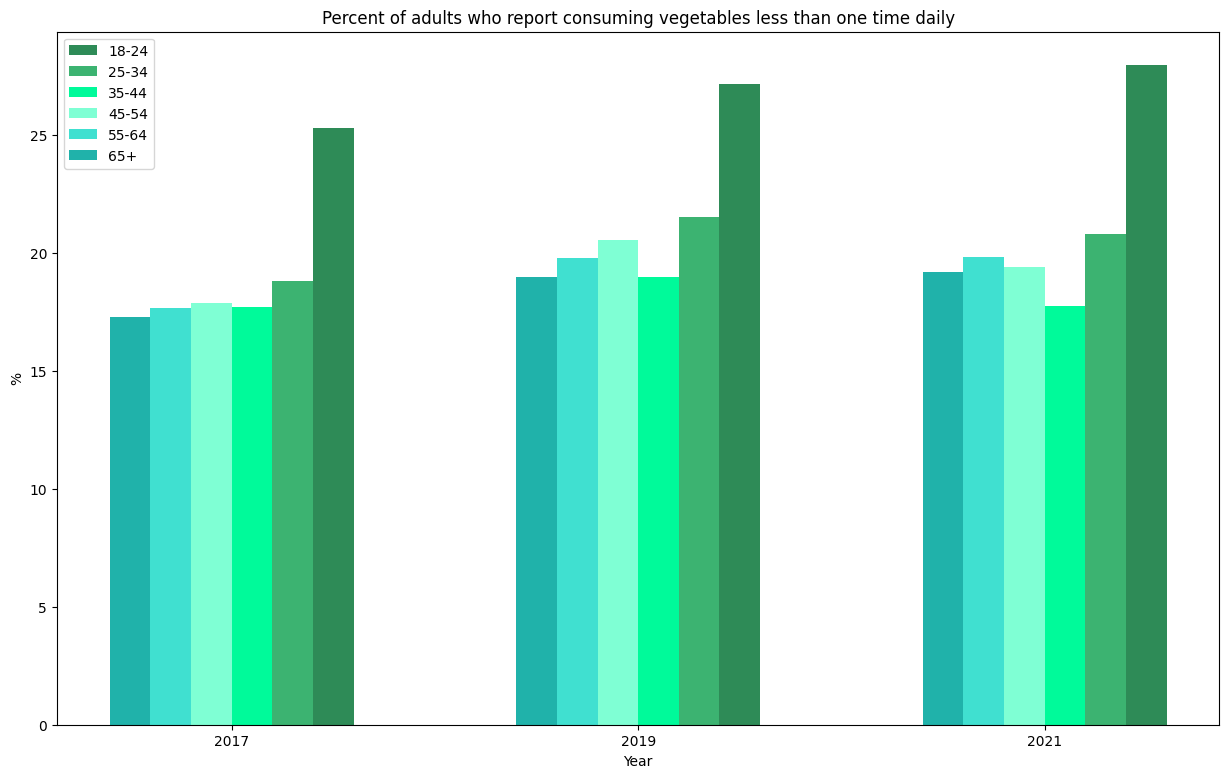

In [32]:
# colors for bar chart
colors = ['seagreen','mediumseagreen','mediumspringgreen','aquamarine','turquoise','lightseagreen']

for question in questions:

    plt.figure(figsize=(15,9))

    if (question == "Q021" or question == "Q020"):
        for i in range(len(grades)):
            xs = grade_question_dfs[i][question].index
            ys = grade_question_dfs[i][question]["Data_Value"]

            upper_error = grade_question_dfs[i][question]["High_Confidence_Limit"] - grade_question_dfs[i][question]["Data_Value"]
            lower_error = grade_question_dfs[i][question]["Data_Value"] - grade_question_dfs[i][question]["Low_Confidence_Limit"]
            
            plt.bar(xs-0.3*i+0.45, ys, 0.3, capsize=3, label=grade_names[i], color=colors[i+1])
    else:
        for i in range(len(ages)):
            xs = age_question_dfs[i][question].index
            ys = age_question_dfs[i][question]["Data_Value"]

            upper_error = age_question_dfs[i][question]["High_Confidence_Limit"] - age_question_dfs[i][question]["Data_Value"]
            lower_error = age_question_dfs[i][question]["Data_Value"] - age_question_dfs[i][question]["Low_Confidence_Limit"]
            
            plt.bar(xs-0.2*i+0.5, ys, 0.2, capsize=3, label=age_names[i], color=colors[i])
    
    plt.gcf()
    plt.xlabel("Year")
    plt.ylabel("%")
    if (question == "Q021" or question == "Q020"):
        plt.xticks(np.arange(2001, 2021, step=2))
    else:
        plt.xticks(np.arange(2017, 2023, step=2))
    plt.title(ID_to_question_map[question])
    plt.legend()
    plt.show()

#### next, income:

In [33]:
incs = []

for stratum in strata:
    if str(stratum).find("INC") != -1:
        incs.append(stratum)

incs.sort()

temp = incs[5]
for i in range(4,-1,-1):
    incs[i+1] = incs[i]
incs[0] = temp

incs

['INCLESS15', 'INC1525', 'INC2535', 'INC3550', 'INC5075', 'INC75PLUS', 'INCNR']

In [34]:
inc_question_dfs = [{},{},{},{},{},{},{}]

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in ["Q018","Q019"]:
    for i in range(len(incs)):
        temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == incs[i])].drop(["QuestionID"], axis=1)
        temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

        weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
        temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
        
        inc_question_dfs[i][question] = temp_df

inc_question_dfs

[{'Q018':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  41.299145              48.264221   44.726655
  2019                  41.676310              48.909414   45.258473
  2021                  40.070121              48.740148   44.355228,
  'Q019':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  27.734248              34.264843   30.826430
  2019                  29.605241              36.543053   32.927958
  2021                  27.842579              36.040158   31.750313},
 {'Q018':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  36.795709              41.930932   39.319462
  2019                  39.183649              44.678136   41.898028
  2021 

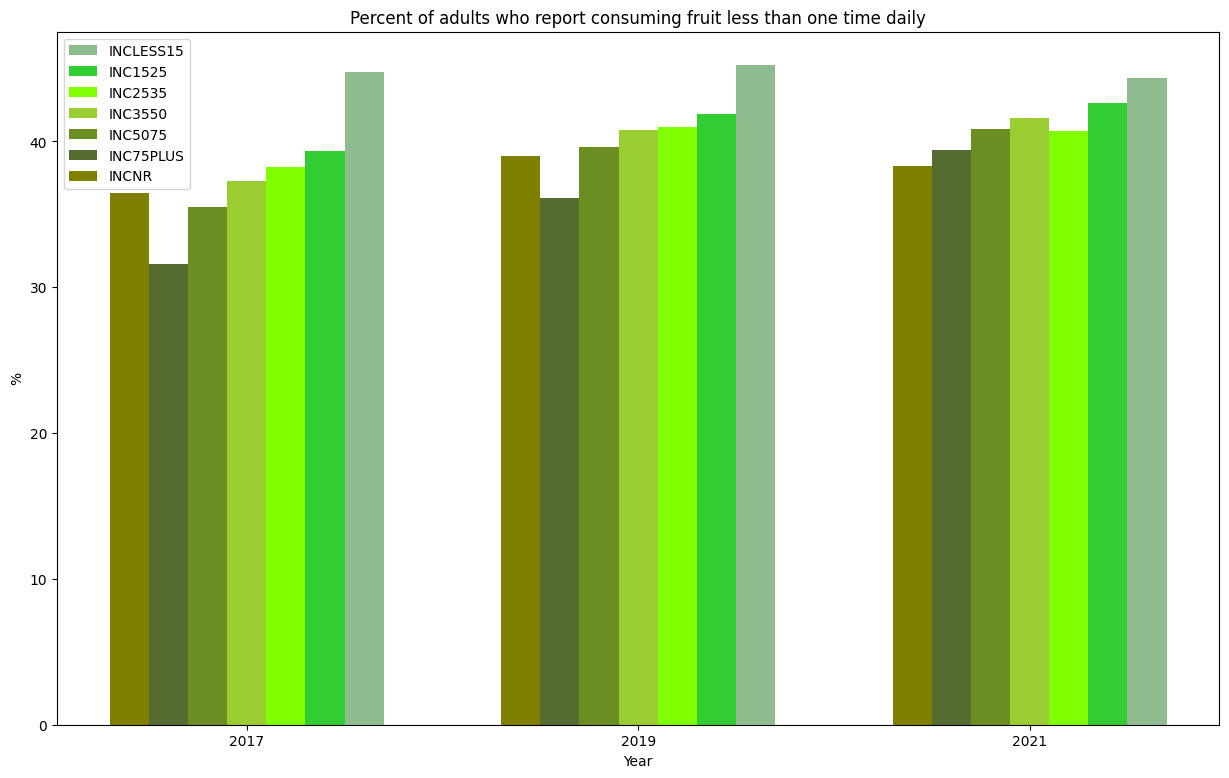

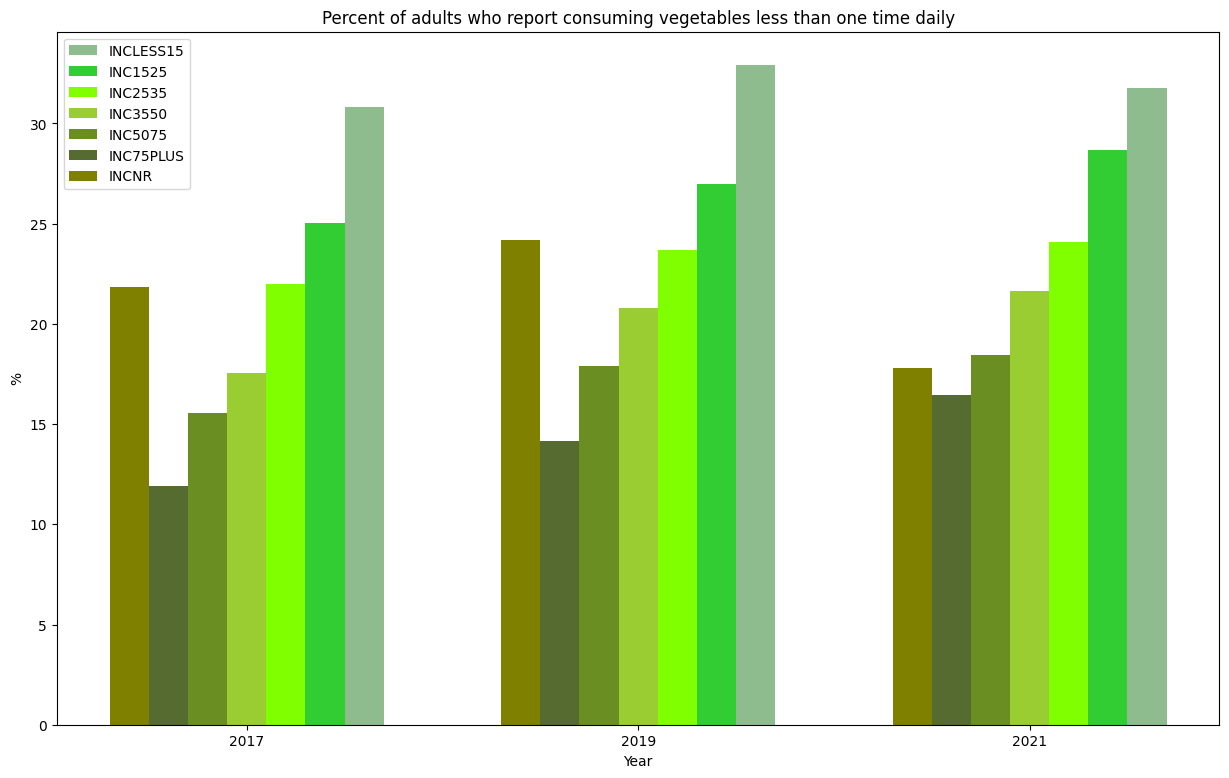

In [35]:
# colors for bar chart
colors = ['darkseagreen','limegreen','chartreuse','yellowgreen','olivedrab','darkolivegreen','olive','darkgoldenrod']

for question in ["Q018", "Q019"]:

    plt.figure(figsize=(15,9))

    for i in range(len(incs)):
        xs = inc_question_dfs[i][question].index
        ys = inc_question_dfs[i][question]["Data_Value"]

        upper_error = inc_question_dfs[i][question]["High_Confidence_Limit"] - inc_question_dfs[i][question]["Data_Value"]
        lower_error = inc_question_dfs[i][question]["Data_Value"] - inc_question_dfs[i][question]["Low_Confidence_Limit"]
        
        plt.bar(xs-0.2*i+0.6, ys, 0.2, capsize=3, label=incs[i], color=colors[i])
    
    plt.gcf()
    plt.xlabel("Year")
    plt.ylabel("%")
    plt.xticks(np.arange(2017, 2023, step=2))
    plt.title(ID_to_question_map[question])
    plt.legend()
    plt.show()

#### last, education.

In [36]:
edus = []

for stratum in strata:
    if str(stratum).find("EDU") != -1:
        edus.append(stratum)

edus.sort()
edus.reverse()
temp = edus[0]
edus[0] = edus[1]
edus[1] = temp

edus

['EDUHS', 'EDUHSGRAD', 'EDUCOTEC', 'EDUCOGRAD']

In [37]:
edu_names = ['attended high school', 'graduated high school', 'attended technical college', 'graduated college']

In [38]:
edu_question_dfs = [{},{},{},{}]

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in ["Q018","Q019"]:
    for i in range(len(edus)):
        temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == edus[i])].drop(["QuestionID"], axis=1)
        temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

        weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
        temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
        
        edu_question_dfs[i][question] = temp_df

edu_question_dfs

[{'Q018':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  38.455027              45.317218   41.801209
  2019                  38.639907              45.744508   42.166665
  2021                  37.526324              45.134854   41.248273,
  'Q019':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  30.784079              37.433890   33.945729
  2019                  31.931280              38.815798   35.227835
  2021                  30.474696              37.778396   33.983145},
 {'Q018':            Low_Confidence_Limit  High_Confidence_Limit  Data_Value
  YearStart                                                         
  2017                  39.436963              43.071641   41.210415
  2019                  42.043198              45.753467   43.884477
  2021 

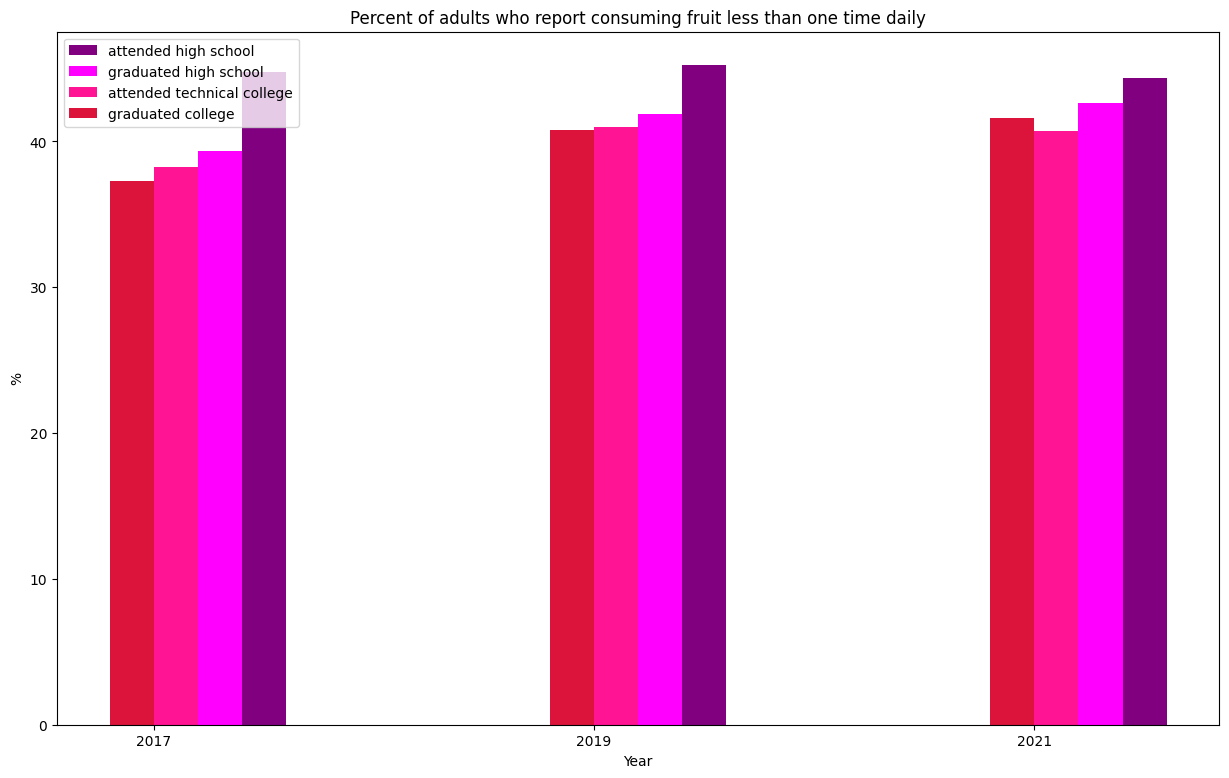

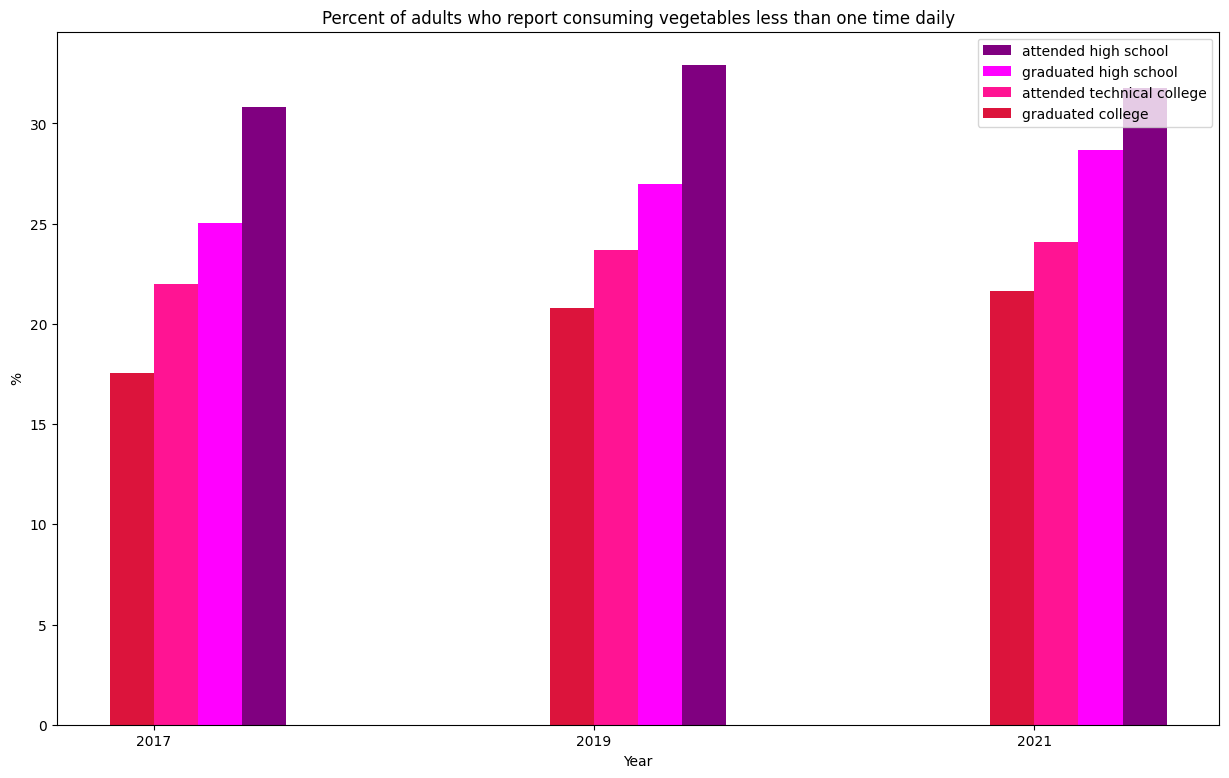

In [39]:
# colors for bar chart
colors = ['purple','fuchsia','deeppink','crimson']

for question in ["Q018", "Q019"]:

    plt.figure(figsize=(15,9))

    for i in range(len(edus)):
        xs = inc_question_dfs[i][question].index
        ys = inc_question_dfs[i][question]["Data_Value"]

        upper_error = inc_question_dfs[i][question]["High_Confidence_Limit"] - inc_question_dfs[i][question]["Data_Value"]
        lower_error = inc_question_dfs[i][question]["Data_Value"] - inc_question_dfs[i][question]["Low_Confidence_Limit"]
        
        plt.bar(xs-0.2*i+0.5, ys, 0.2, capsize=3, label=edu_names[i], color=colors[i])
    
    plt.gcf()
    plt.xlabel("Year")
    plt.ylabel("%")
    plt.xticks(np.arange(2017, 2023, step=2))
    plt.title(ID_to_question_map[question])
    plt.legend()
    plt.show()

### now, we will do a t-test to see if the number of high school students eating fruit from before vs after veganism changed.

In [92]:
VEGAN_START_TIME = 2017

pre_vegan_fruit = question_dfs["Q020"][question_dfs["Q020"].index < VEGAN_START_TIME]["Data_Value"]
post_vegan_fruit = question_dfs["Q020"][question_dfs["Q020"].index >= VEGAN_START_TIME]["Data_Value"]

pre_vegan_fruit, post_vegan_fruit

(YearStart
 2001    38.686732
 2003    39.944434
 2005    41.601883
 2007    41.802403
 2009    39.446405
 2011    38.552290
 2013    39.462887
 2015    41.563774
 Name: Data_Value, dtype: float64,
 YearStart
 2017    42.823226
 2019    45.446923
 Name: Data_Value, dtype: float64)

In [95]:
np.var(pre_vegan_fruit)

1.5672490612101866

In [96]:
np.var(post_vegan_fruit)

1.7209458026481155

In [93]:
# the variances seem to be equal
stats.ttest_ind(pre_vegan_fruit, post_vegan_fruit, equal_var=True)

Ttest_indResult(statistic=-3.5821738023669725, pvalue=0.007165574288702189)

In [97]:
pre_vegan_vegs = question_dfs["Q021"][question_dfs["Q021"].index < VEGAN_START_TIME]["Data_Value"]
post_vegan_vegs = question_dfs["Q021"][question_dfs["Q021"].index >= VEGAN_START_TIME]["Data_Value"]

pre_vegan_vegs, post_vegan_vegs

(YearStart
 2001    34.842554
 2003    36.466599
 2005    37.552871
 2007    39.238145
 2009    38.447037
 2011    37.918598
 2013    38.473181
 2015    39.905238
 Name: Data_Value, dtype: float64,
 YearStart
 2017    41.060240
 2019    42.000331
 Name: Data_Value, dtype: float64)

In [98]:
np.var(pre_vegan_vegs)

2.243379338061593

In [83]:
np.var(post_vegan_vegs)

0.7341350783734958

In [107]:
stats.ttest_ind(pre_vegan_vegs, post_vegan_vegs, equal_var=True)

Ttest_indResult(statistic=-3.0658831770155945, pvalue=0.015444076279176587)

#### also analyzed the differences between data points but i dont think that this would change under the assumption of constant variance of the % of people who eat greens

In [116]:
pre_vegan_fruit_diffs = np.diff(question_dfs["Q020"][question_dfs["Q020"].index < VEGAN_START_TIME]["Data_Value"])
post_vegan_fruit_diffs = np.diff(question_dfs["Q020"][question_dfs["Q020"].index >= VEGAN_START_TIME - 2]["Data_Value"])

pre_vegan_fruit_diffs, post_vegan_fruit_diffs

(array([ 1.25770195,  1.65744901,  0.20051924, -2.35599776, -0.89411458,
         0.91059665,  2.10088759]),
 array([1.25945205, 2.62369648]))

In [117]:
np.var(pre_vegan_fruit_diffs)

2.111394145656985

In [118]:
np.var(post_vegan_fruit_diffs)

0.46529071249981147

In [123]:
stats.ttest_ind(pre_vegan_fruit_diffs, post_vegan_fruit_diffs, equal_var=False)

Ttest_indResult(statistic=-1.6931336781965027, pvalue=0.19492566721787025)

In [119]:
pre_vegan_veg_diffs = np.diff(question_dfs["Q021"][question_dfs["Q021"].index < VEGAN_START_TIME]["Data_Value"])
post_vegan_veg_diffs = np.diff(question_dfs["Q021"][question_dfs["Q021"].index >= VEGAN_START_TIME-2]["Data_Value"])

In [120]:
np.var(pre_vegan_veg_diffs)

0.894224292184865

In [121]:
np.var(post_vegan_veg_diffs)

0.011546732616488036

In [122]:
stats.ttest_ind(pre_vegan_veg_diffs, post_vegan_veg_diffs, equal_var=False)

Ttest_indResult(statistic=-0.8092888732085967, pvalue=0.4460379313289562)